In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_data = pd.read_csv('netflix_titles.csv')

In [3]:
print(netflix_data.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [4]:
print("Shape of the dataset:", netflix_data.shape)

Shape of the dataset: (8807, 12)


In [5]:
print("Missing values in the dataset:")
print(netflix_data.isnull().sum())

Missing values in the dataset:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [6]:
print("Summary statistics of numerical columns:")
print(netflix_data.describe())

Summary statistics of numerical columns:
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [7]:
print("Count of titles by type:")
print(netflix_data['type'].value_counts())

Count of titles by type:
Movie      6131
TV Show    2676
Name: type, dtype: int64


In [8]:
print("Count of titles by country:")
print(netflix_data['country'].value_counts().head(10))

Count of titles by country:
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64


In [9]:
print("Count of titles by release year:")
print(netflix_data['release_year'].value_counts().head(10))

Count of titles by release year:
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: release_year, dtype: int64


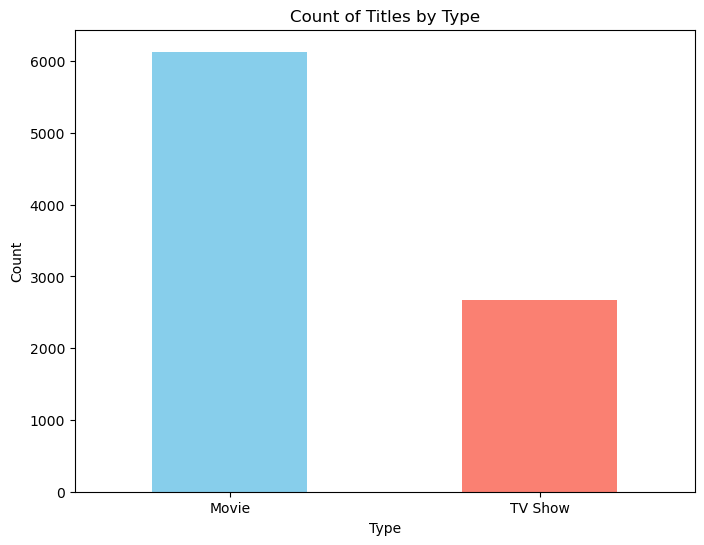

In [10]:
plt.figure(figsize=(8, 6))
netflix_data['type'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Titles by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

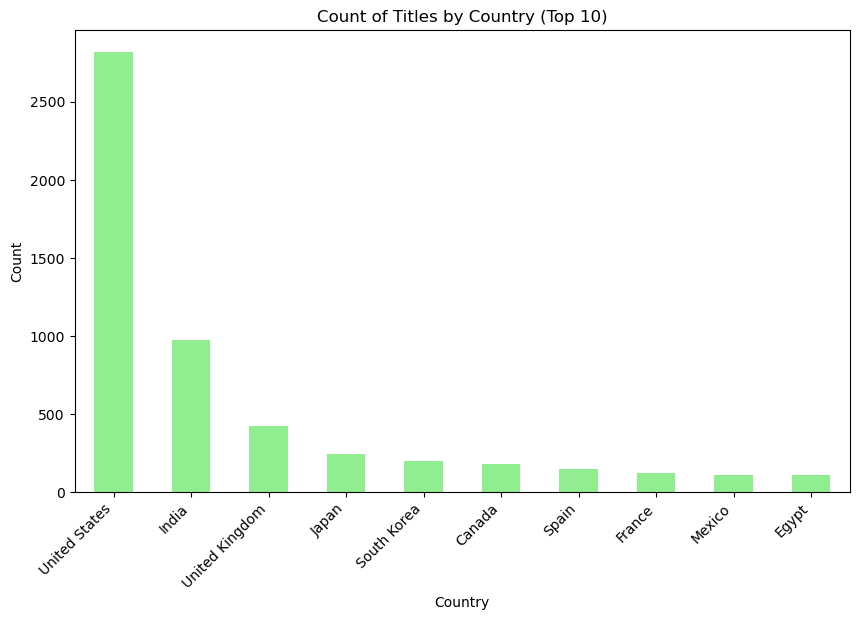

In [11]:
plt.figure(figsize=(10, 6))
netflix_data['country'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Count of Titles by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

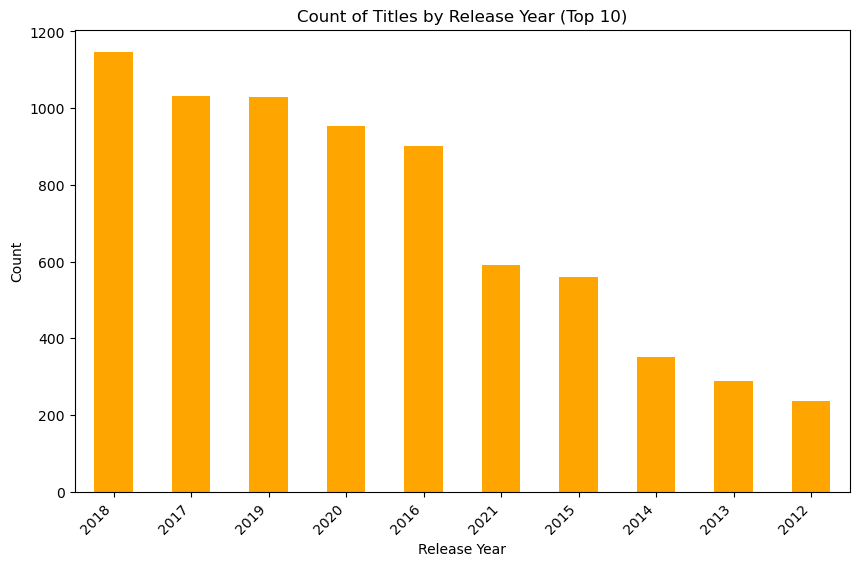

In [12]:
plt.figure(figsize=(10, 6))
netflix_data['release_year'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Count of Titles by Release Year (Top 10)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

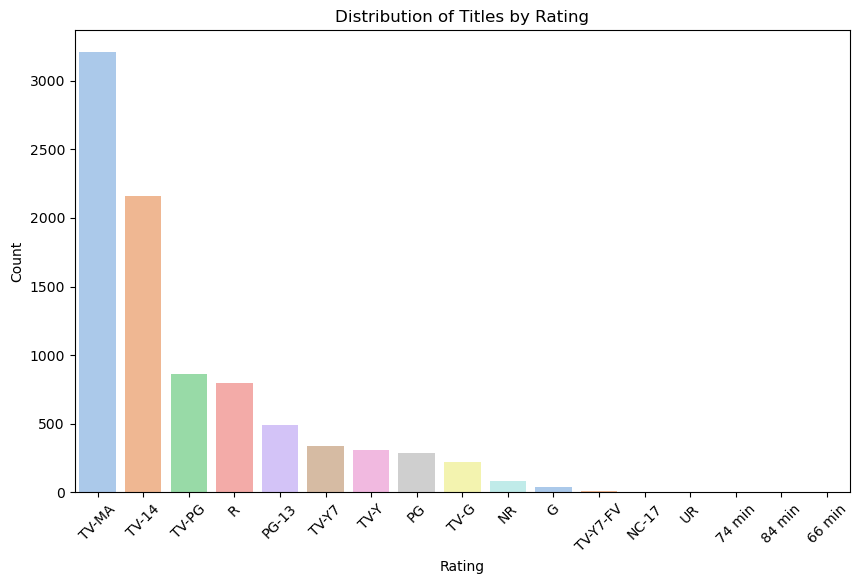

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=netflix_data, order=netflix_data['rating'].value_counts().index, palette='pastel')
plt.title('Distribution of Titles by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_16572\3126862905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['duration'] = movies_data['duration'].str.replace(' min', '')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16572\3126862905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['duration'] = pd.to_numeric(movies_data['duration'], errors='coerce')


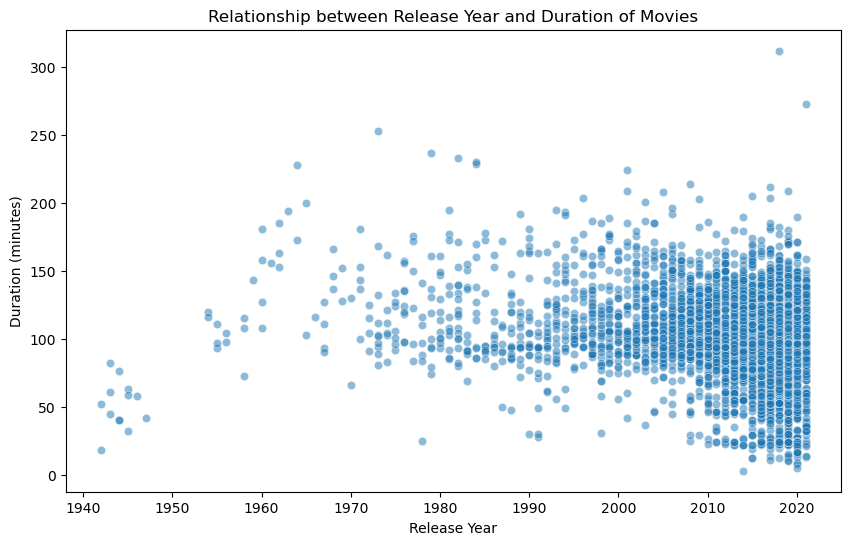

In [14]:
movies_data = netflix_data[netflix_data['type'] == 'Movie']
movies_data['duration'] = movies_data['duration'].str.replace(' min', '')
movies_data['duration'] = pd.to_numeric(movies_data['duration'], errors='coerce')
movies_data = movies_data.dropna(subset=['duration'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='duration', data=movies_data, alpha=0.5)
plt.title('Relationship between Release Year and Duration of Movies')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()

In [15]:
pip install wordcloud

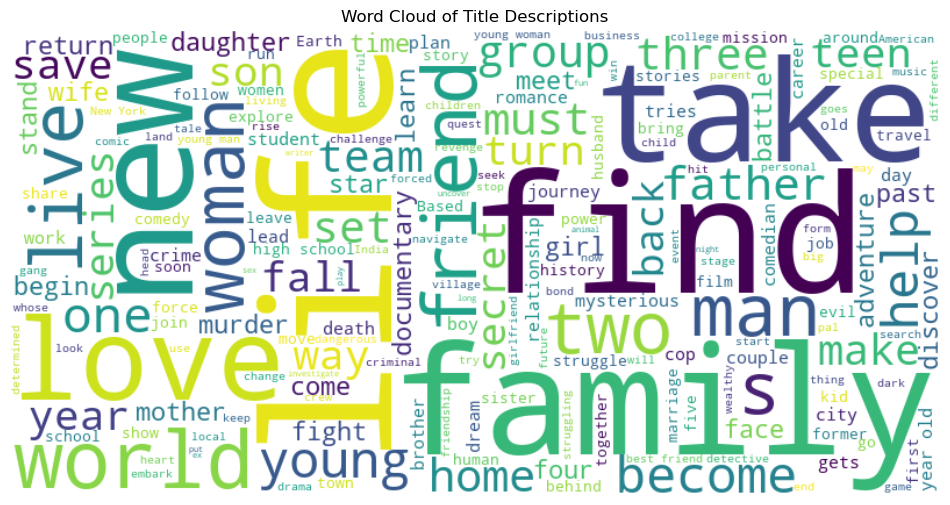

In [16]:
from wordcloud import WordCloud

descriptions = ' '.join(netflix_data['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Title Descriptions')
plt.axis('off')
plt.show()

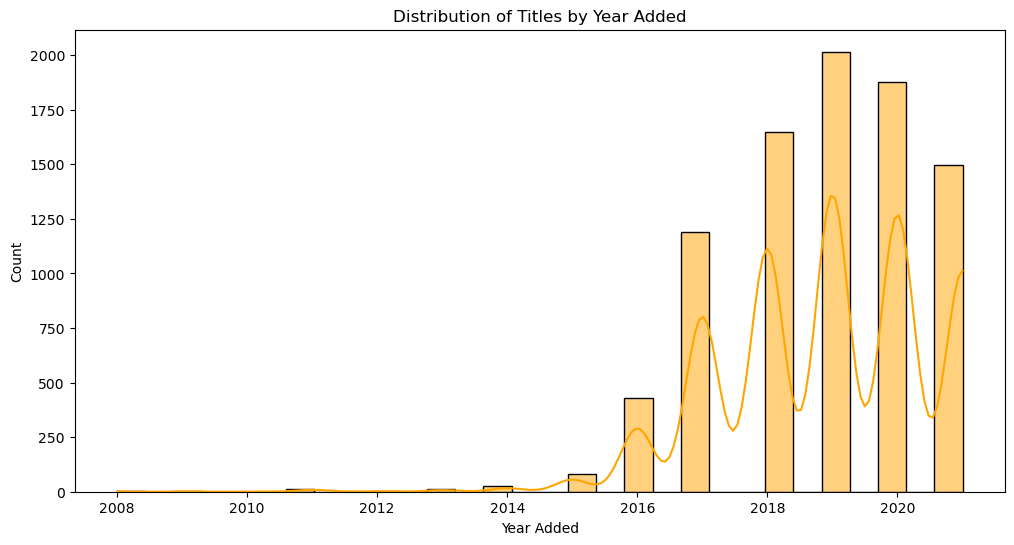

In [17]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['year_added'] = netflix_data['date_added'].dt.year

plt.figure(figsize=(12, 6))
sns.histplot(x='year_added', data=netflix_data, bins=30, kde=True, color='orange')
plt.title('Distribution of Titles by Year Added')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()


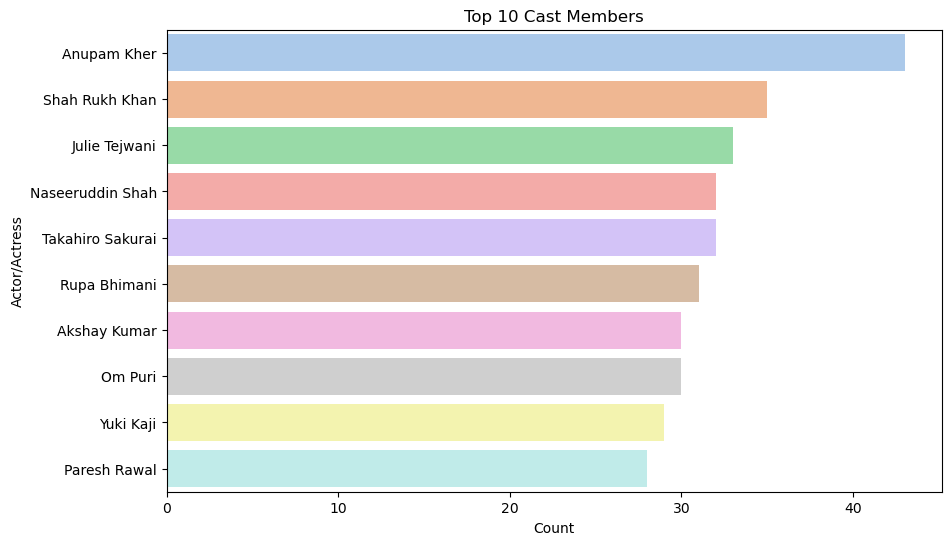

In [18]:
cast = netflix_data['cast'].str.split(', ', expand=True).stack().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=cast.values, y=cast.index, palette='pastel')
plt.title('Top 10 Cast Members')
plt.xlabel('Count')
plt.ylabel('Actor/Actress')
plt.show()


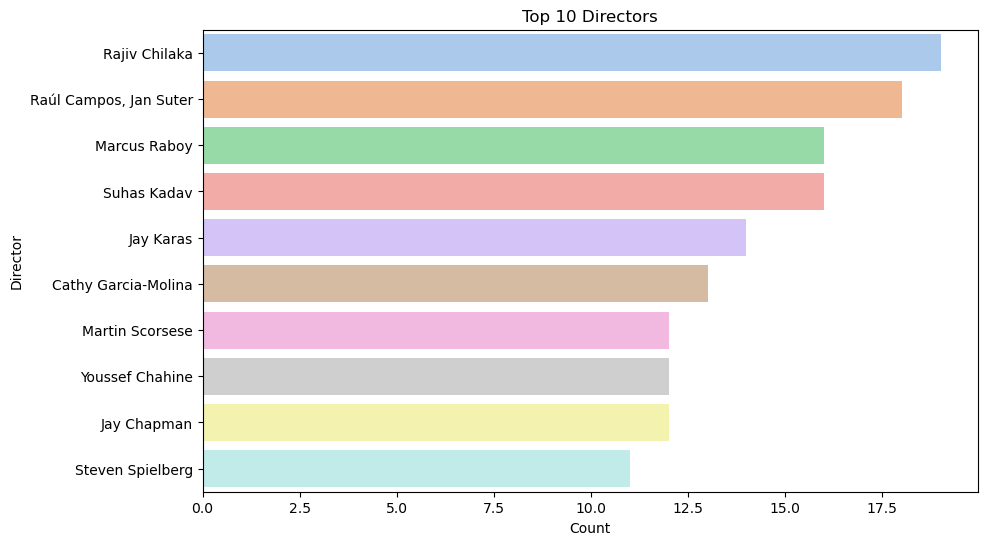

In [19]:
directors = netflix_data['director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=directors.values, y=directors.index, palette='pastel')
plt.title('Top 10 Directors')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()


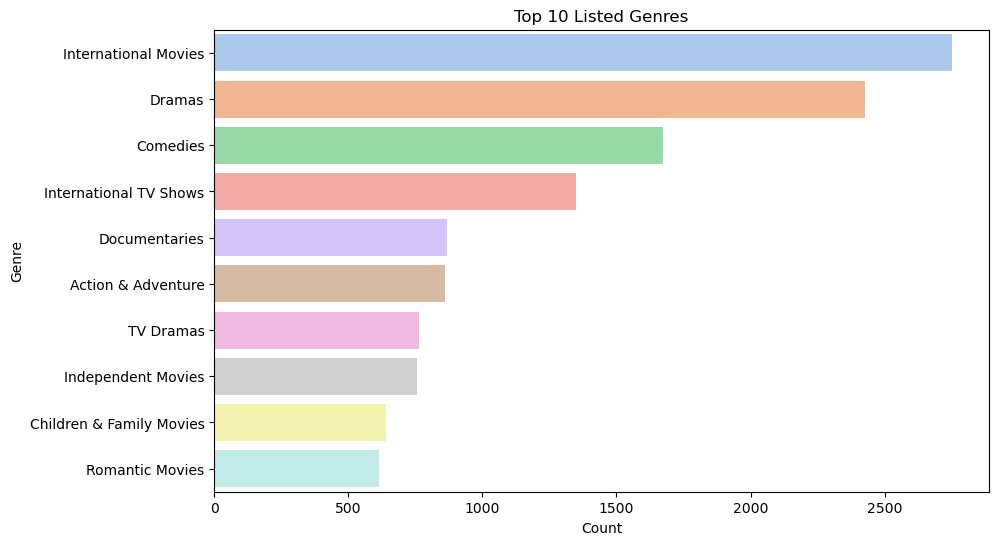

In [20]:
genres = netflix_data['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genres.values, y=genres.index, palette='pastel')
plt.title('Top 10 Listed Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

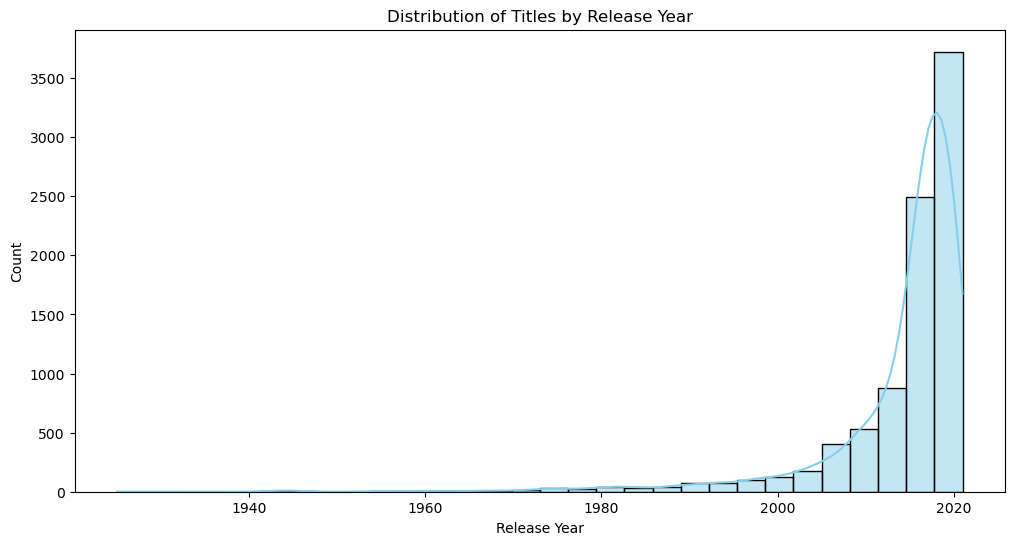

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(x='release_year', data=netflix_data, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Titles by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


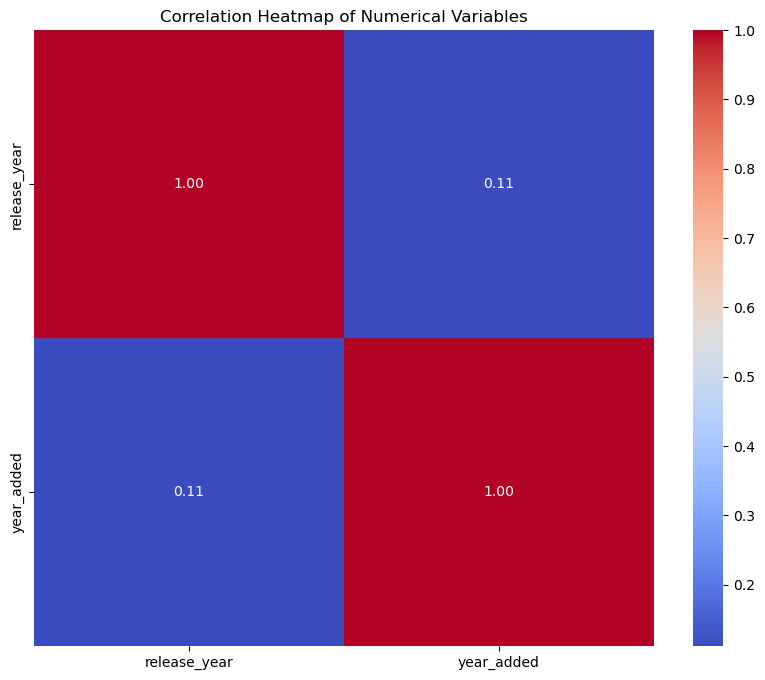

In [22]:
numerical_columns = netflix_data.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_columns.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16572\3405286021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_16572\3405286021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data['month_added'] = netflix_data['date_added'].dt.month


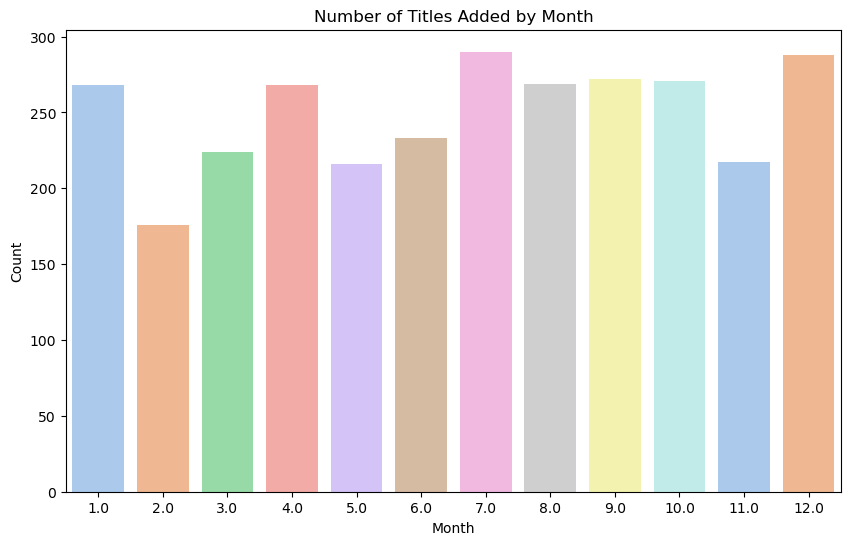

In [26]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['month_added'] = netflix_data['date_added'].dt.month

plt.figure(figsize=(10, 6))
sns.countplot(x='month_added', data=netflix_data, palette='pastel')
plt.title('Number of Titles Added by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


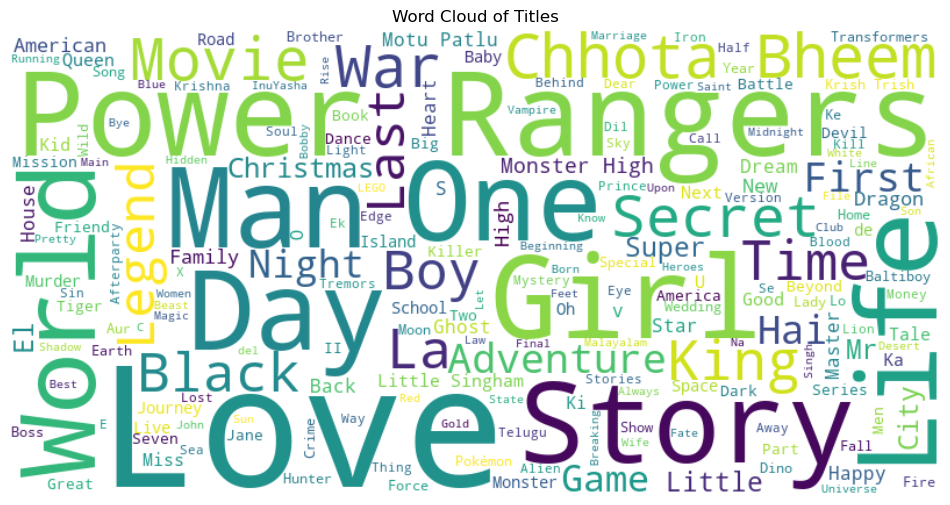

In [27]:
from wordcloud import WordCloud

titles = ' '.join(netflix_data['title'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Titles')
plt.axis('off')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_16572\3635393125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_data['season_count'] = tv_shows_data['duration'].str.extract('(\d+)').astype(int)


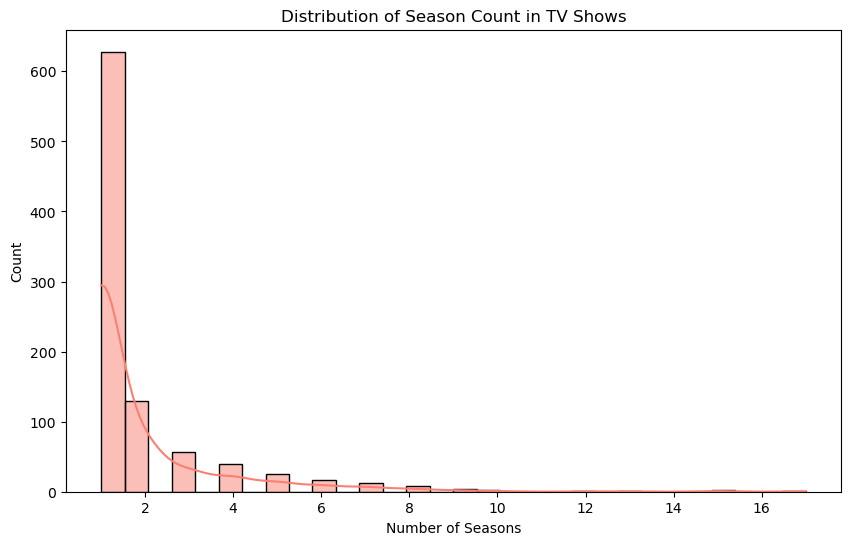

In [29]:
tv_shows_data = netflix_data[netflix_data['type'] == 'TV Show']
tv_shows_data['season_count'] = tv_shows_data['duration'].str.extract('(\d+)').astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(x='season_count', data=tv_shows_data, bins=30, kde=True, color='salmon')
plt.title('Distribution of Season Count in TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()